In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
dataset = pd.read_csv("UberDataset.csv")

In [17]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [18]:
dataset.shape

(1156, 7)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [20]:
dataset['PURPOSE'].fillna("NOT", inplace = True)

In [21]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [22]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors = 'coerce')

dataset['END_DATE'] = pd.to_datetime(dataset['START_DATE'], errors = 'coerce')

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    421 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [24]:
from datetime import datetime

dataset['DATE'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['TIME'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [25]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:25:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [26]:
dataset['DAY-NIGHT'] = pd.cut(x = dataset['TIME'],bins = [0,10,15,19,24], labels = ['Morning','Afternoon','Evening','Night'])

In [27]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:25:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [28]:
dataset.dropna(inplace = True)

In [29]:
dataset.shape

(414, 10)

# Data Visualization
# In which category do people book the most Uber rides & For which purpose do people book Uber rides the most?

Text(0.5, 1.0, 'PURPOSE Count')

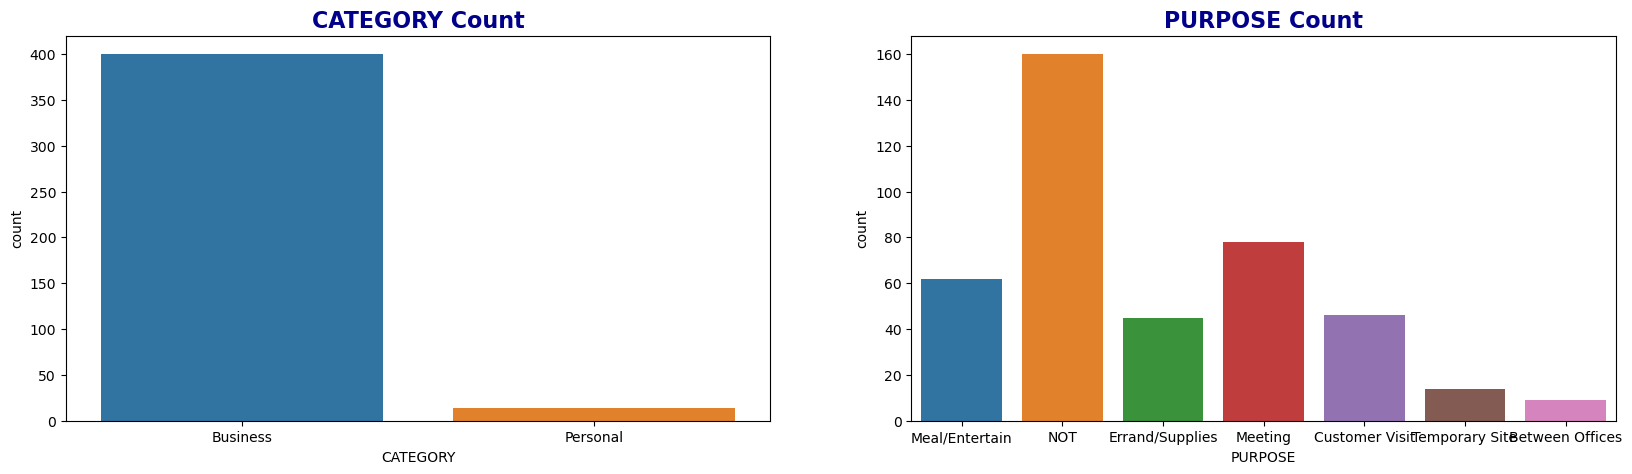

In [53]:
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=dataset)
plt.title("CATEGORY Count", fontsize = 16, fontweight = 'bold', color = 'darkblue')

plt.subplot(1, 2, 2)
sns.countplot(x='PURPOSE', data=dataset)
plt.title("PURPOSE Count", fontsize = 16, fontweight = 'bold', color = 'darkblue')


# At what time do people book cabs the most from Uber?

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Count of DAY vs NIGHT Trips')

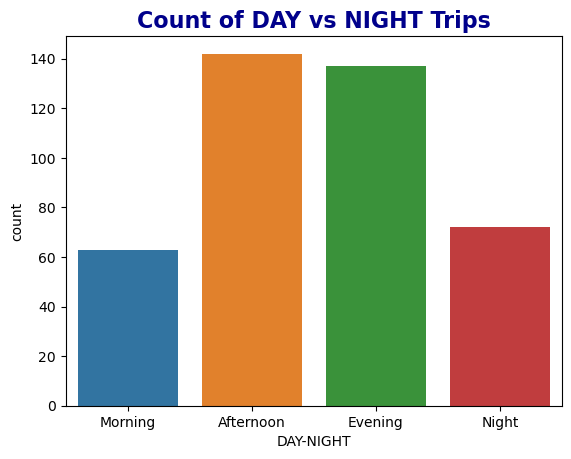

In [52]:
sns.countplot(x='DAY-NIGHT', data=dataset)
plt.title("Count of DAY vs NIGHT Trips", fontsize = 16, fontweight = 'bold', color = 'darkblue')

# In which months do people book Uber rides less frequently?

In [63]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar',
                4.0: 'April', 5.0: 'May', 6.0: 'Jun',
                  7.0: 'July', 8.0: 'Aug', 9.0: 'Sep',
                  10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset['MONTH'] = dataset.MONTH.map(month_label)
mon = dataset.MONTH.value_counts(sort=False)

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


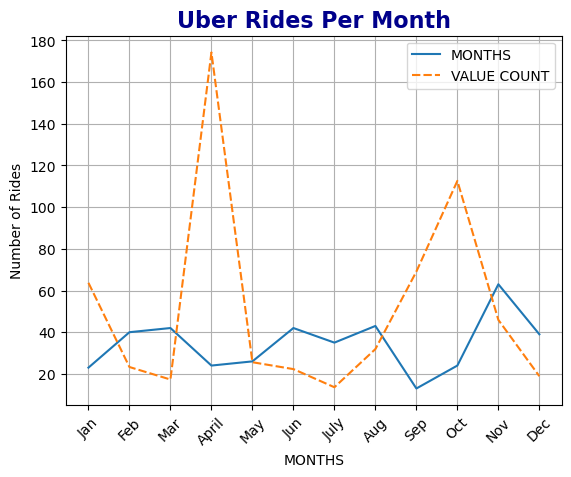

In [67]:
df = pd.DataFrame({
    "MONTHS": mon.values,
    "VALUE COUNT": dataset.groupby('MONTH', sort = False)['MILES'].max()
        })
p = sns.lineplot(data = df)
p.set(xlabel = "MONTHS", ylabel = "VALUE COUNT")
plt.xticks(rotation=45)
plt.title("Uber Rides Per Month", fontsize = 16, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Number of Rides")
plt.grid(True)

MONTH
April        24
August       43
December     39
February     40
January      23
July         35
June         42
March        42
May          26
November     63
October      24
September    13
Name: count, dtype: int64


Text(0, 0.5, 'Number of Rides')

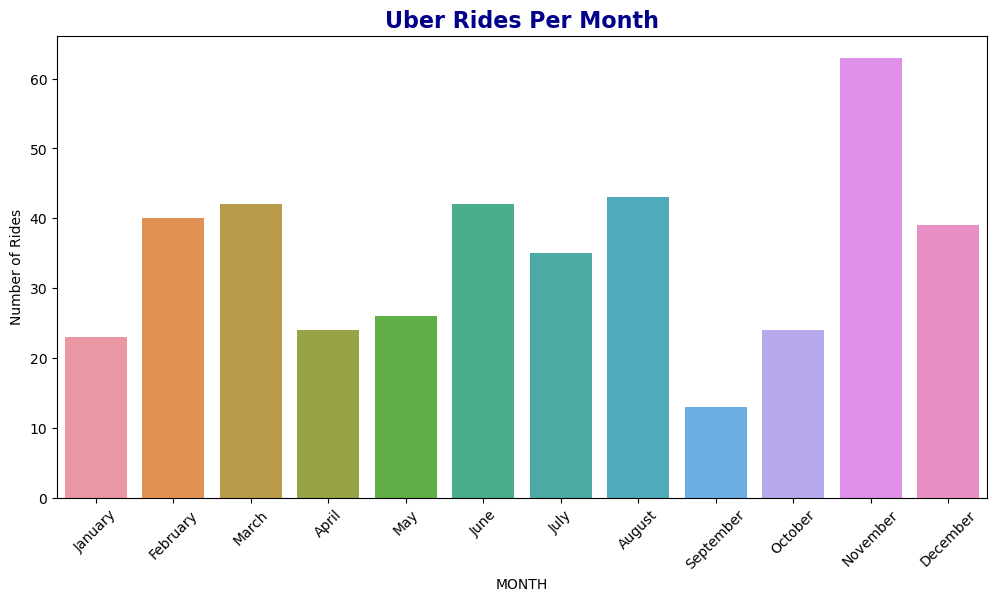

In [57]:
# Convert START_DATE column to datetime format
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])

# Create a new column for Month Name
dataset['MONTH'] = dataset['START_DATE'].dt.month_name()

monthly_counts = dataset['MONTH'].value_counts().sort_index()
print(monthly_counts)

plt.figure(figsize=(12, 6))
sns.countplot(x='MONTH', data=dataset, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.xticks(rotation=45)
plt.title("Uber Rides Per Month", fontsize = 16, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Number of Rides")


# # Step 1: Convert date and extract month info
# dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])
# dataset['MONTH'] = dataset['START_DATE'].dt.month_name()
# dataset['MONTH_NUM'] = dataset['START_DATE'].dt.month

# # Step 2: Create ordered counts for each month
# month_order = ['January', 'February', 'March', 'April', 'May', 'June',
#                'July', 'August', 'September', 'October', 'November', 'December']

# monthly_counts = dataset['MONTH'].value_counts().reindex(month_order)

# # Normalize counts for color mapping
# norm = plt.Normalize(monthly_counts.min(), monthly_counts.max())
# colors = plt.cm.get_cmap('RdYlGn_r')(norm(monthly_counts.values))

# # Step 3: Plot with custom colors
# plt.figure(figsize=(12, 6))
# sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette=colors)

# # Styling
# plt.xticks(rotation=45)
# plt.title("Uber Rides Per Month", fontsize=16, fontweight='bold', color='darkblue')
# plt.ylabel("Number of Rides")
# plt.xlabel("Month")
# plt.tight_layout()


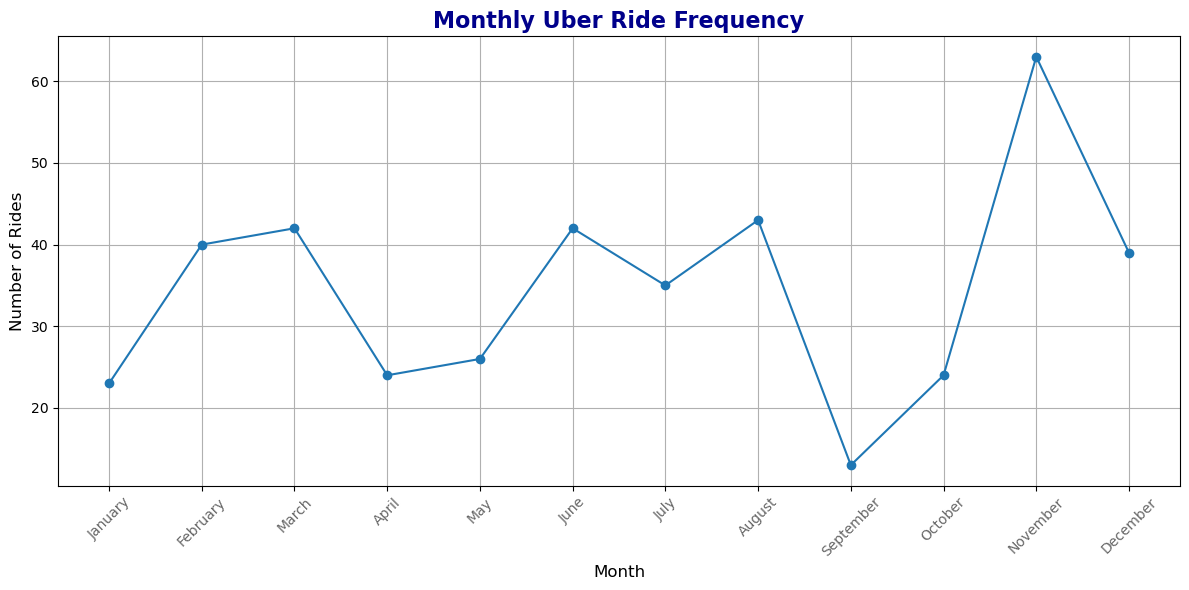

In [49]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])
dataset['MONTH'] = dataset['START_DATE'].dt.month_name()
dataset['MONTH_NUM'] = dataset['START_DATE'].dt.month

monthly_counts = dataset.groupby(['MONTH_NUM', 'MONTH']).size().reset_index(name='RIDE_COUNT')
monthly_counts = monthly_counts.sort_values('MONTH_NUM')

plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['MONTH'], monthly_counts['RIDE_COUNT'], marker='o', linestyle='-')
plt.title("Monthly Uber Ride Frequency", fontsize = 16, fontweight = 'bold', color = 'darkblue')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Number of Rides", fontsize = 12)
plt.xticks(rotation=45, alpha = 0.6)
plt.grid(True)
plt.tight_layout()

# On which days of the week do people book Uber rides the most?

In [68]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0:'Mon', 1:'Tues', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
dataset['DAY'] = dataset['DAY'].map(day_label)

In [69]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,MONTH_NUM,DAY
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,1,Fri
1,2016-01-02 01:25:00,2016-01-02 01:25:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,1,Sat
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,1,Sat
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,1,Tues
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,1,Wed


Text(0.5, 1.0, 'Weekly Uber Rides')

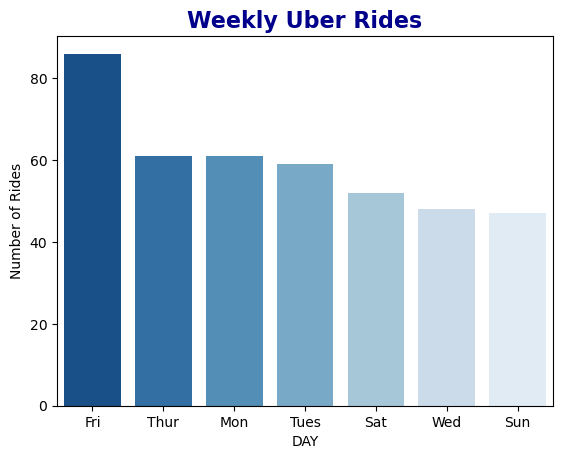

In [118]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label, palette=colors)
plt.xlabel('DAY')
plt.ylabel('Number of Rides')
plt.title('Weekly Uber Rides', fontsize = 16, fontweight = 'bold', color = 'darkblue')

# How many miles do people usually book a cab for through Uber?

count    414.000000
mean       9.119807
std       16.497271
min        0.500000
25%        2.725000
50%        5.700000
75%        9.900000
max      174.200000
Name: MILES, dtype: float64


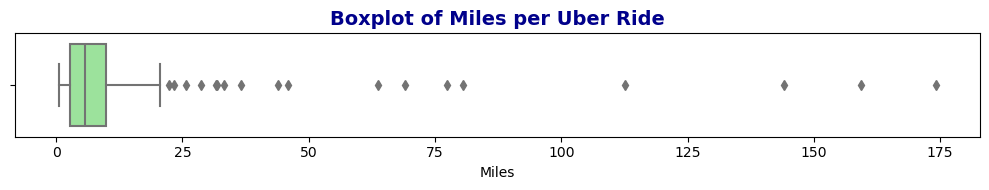

In [91]:
print(dataset['MILES'].describe())

plt.figure(figsize=(10, 2))
sns.boxplot(x=dataset['MILES'], color='lightgreen')
plt.title("Boxplot of Miles per Uber Ride", fontsize=14, fontweight = 'bold', color = 'darkblue')
plt.xlabel("Miles")
plt.tight_layout()


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_19900\3743065067.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES'] < 40]['MILES'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

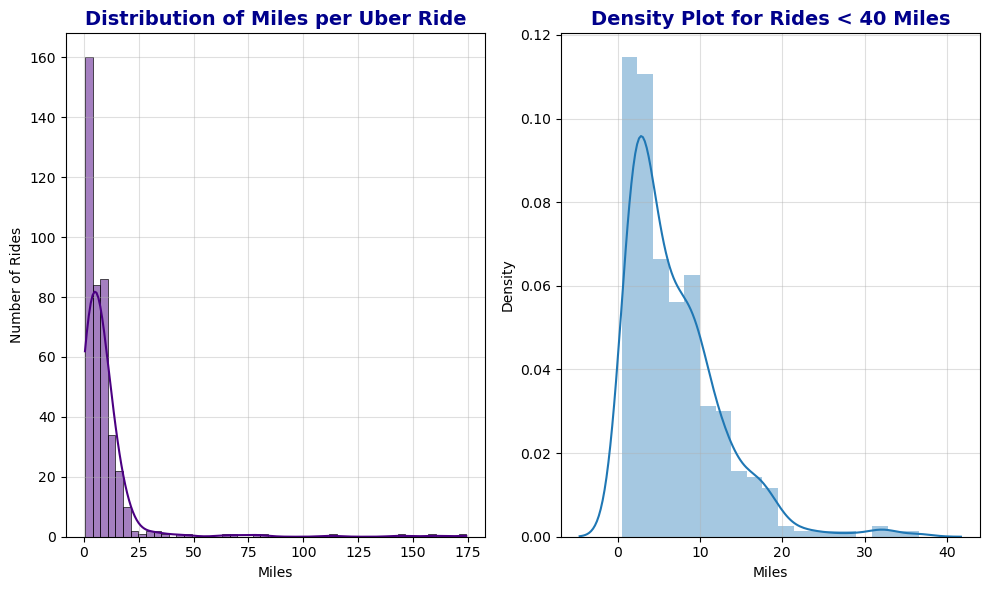

In [107]:
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
sns.histplot(dataset['MILES'], bins=50, kde=True, color='indigo')
plt.title("Distribution of Miles per Uber Ride", fontsize=14, fontweight='bold', color = 'darkblue')
plt.xlabel("Miles")
plt.ylabel("Number of Rides")
plt.grid(True, alpha=0.4)

plt.subplot(1,2,2)
sns.distplot(dataset[dataset['MILES'] < 40]['MILES'])
plt.title("Density Plot for Rides < 40 Miles", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Miles")
plt.ylabel("Density")
plt.grid(True, alpha=0.4)

plt.tight_layout()